# 3 Datenimport und -export

<div class="alert alert-info"> Um bereits vorhandene Daten nutzen zu können, müssen wir diese zunächst importieren. Für verschiedene Dateiformate benötigen wir unterschiedliche Funktionen, die wir in diesem Kapitel kennenlernen werden. Um aufbereitete Daten, Grafiken oder um unsere Daten mit anderen auszutauschen, müssen wir wissen, wie wir unsere Ergebnisse abspeichern können. 
    <ol>
        <li> Daten einlesen </li>
        <li> Daten ausgeben </li>
    </ol>
    
Nach dieser Lerneinheit können Sie unterschiedliche Datentypen aus unterschiedlichen Quellen aufrufen. Außerdem sind Sie in der Lage einen Datensatz in einem gewünschten Dateiformat abzuspeichern.</div>

## Einschub: Arbeitsverzeichnis & Dateisystem

Das aktuelle Arbeitsverzeichnis (**c**urrent **w**orking **d**irectory [**cwd**]) ist das Verzeichnis, in dem das aktuelle Pythonprogramm ausgeführt wird.

In [ ]:
import os
print(os.getcwd()) # cwd

#### Relativer Dateipfad angeben
Auf Windows-Computer wird `\\` als Trennzeichen zwischen Verzeichnisnamen verwendet. Dagegen wird auf Linux- oder Mac-Computern `/` als Trennzeichen verwendet. \
Mithilfe der Funktion `os.path.join()` werden die Trennzeichen abhängig vom Betriebssystem gesetzt:

In [ ]:
os.path.join("root", "Users")

In [ ]:
# relativer Dateipfad
os.path.join(os.getcwd(), "Grossstaedte.txt")

Das aktuelle Arbeitsverzeichnis kann mithilfe von `os.chdir()` geändert werden.

In [ ]:
# Zielarbeitsverzeichnis festlegen: Arbeitsverzeichnis mit Daten 
print(os.path.dirname(os.getcwd()))
PATH = os.path.join(os.path.dirname(os.getcwd()), "_Daten")
print(PATH)

In [ ]:
print("Altes Arbeitsverzeichnis = " + os.getcwd())
os.chdir(PATH)
print("Neues Arbeitsverzeichnis = " + os.getcwd())

## 3.1 Daten einlesen

Daten können in unterschiedlichen Dateiformaten (`*.csv`, `*txt`, `*tsv`, `*html`, `*json`,...) vorliegen. Abhängig vom jeweiligen Datentyp, können unterschiedliche Methoden zum Datenimport verwendet werden. Im Folgenden sehen wir uns unter anderem das Einlesen mittels einiger build-in Funktionen sowie mithilfe des Moduls `Pandas` an. Auf `Pandas` kommen wir im nächsten Kapitel **Datenaufbereitung und -manipulation** ausführlich zu sprechen.

### 3.1.1 Text-Dateien (* .txt)

Um Textdaten einzulesen, greifen wir auf build-in Funktionen (`read()`, `readline()` und `readlines()`) in Python zurück. Hierfür müssen wir das Datenobjekt zunächst öffnen, bevor wir den eigentlichen Inhalt einlesen können. Um die Datei zu öffnen, verwenden wir die `open()`-Funktion. Dabei geben wir den Dateinamen und ggf. den Pfad und den gewünschten Modus an. Es gibt unterschiedliche Modi, um eine Datei einzulesen: 
* **w** für write - bestehender Inhalt wird überschrieben
* **r** für read - nur für Lesen
* **a** für append - hinzufügen<br>

Nach dem Lese- bzw. Schreibprozess müssen die Dateien mit `close()` geschlossen werden, um nicht unnötig System-Ressourcen zu verschwenden.

Screenshot unserer Datei **Grossstaedte.txt**:
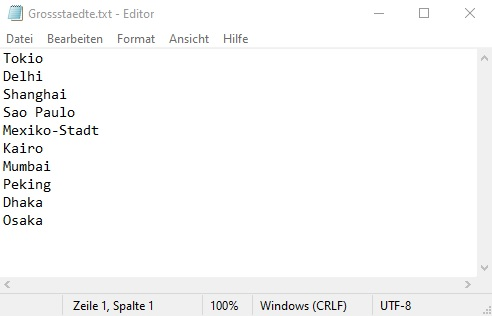

In [ ]:
stadt = open("Grossstaedte.txt", "r") # relativer Dateipfad
# Datenobjekt wird geöffnet und gibt uns Rückgabewert zurück, auf den wir verschiedene Funktionen anwenden können
print(stadt.read())
stadt.close() # Nach Lese- und Schreibvorgänge wird die Datei geschlossen

Nachdem wir die Datei geöffnet haben, stehen uns drei Möglichkeiten zur Verfügung um den Inhalt einzulesen: `read()`, `readline()` und `readlines()`.

In [ ]:
stadt = open("Grossstaedte.txt", "r")
print(stadt.read(15)) # die ersten 15 Zeichen
stadt.close()

In [ ]:
stadt = open("Grossstaedte.txt", "r")
print(stadt.readline()) # die erste Zeile
stadt.close()

In [ ]:
stadt = open("Grossstaedte.txt", "r")
print(stadt.readline()) # die erste Zeile
print(stadt.readline()) # die zweite Zeile
print(stadt.readline()) # die dritte Zeile
stadt.close()

In [ ]:
stadt = open("Grossstaedte.txt", "r")
print(stadt.readlines()) # Liste
stadt.close()

In [ ]:
stadt = open("Grossstaedte.txt", "r")
a = stadt.readlines() # Liste
stadt.close()

<div class="alert alert-warning"><strong>Hinweis:</strong> \n steht für einen Zeilenumbruch.</div>

Alternativ kann mithilfe des `with` Statements auch gewährleistet werden, dass die Datei nach dem Öffnen wieder geschlossen wird. Die Verwendung des `close()`-Befehls ist dann nicht nötig.

In [ ]:
# (Bessere) Alternative
with open("Grossstaedte.txt", "r") as stadt:
    print(stadt.read())
    a = stadt.read()

In [ ]:
with open("Grossstaedte.txt", "r") as stadt:
    print(stadt.readlines())

### 3.1.2 csv-Dateien (*.csv)

Bei dem nächsten Datensatz, den wir einlesen, handelt es sich um eine csv-Datei. Diese könnten wir ebenfalls mit den oben genannten Befehlen importieren, was sich jedoch oft als fehleranfällig erweist. Die `csv` library bietet sich für diese Art der Daten an. <br>
Screenshot unserer Datei **Datensatz_Herzinfarkt.csv**:
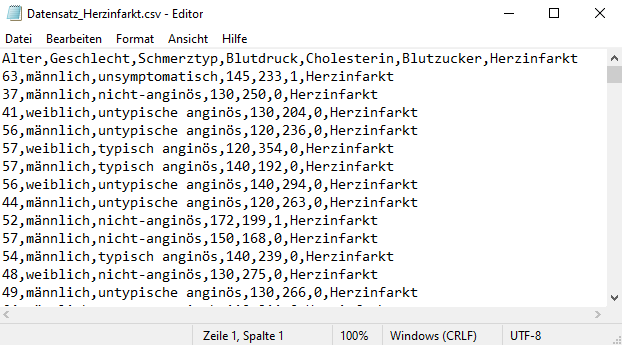

`csv.reader()` liest die Datei ein und gibt uns ein reader-Objekt aus. Mithilfe des `delimiter`-Attributs können wir bestimmen, wie unsere Variablen innerhalb der Zeilen getrennt sind. Danach kann jede Zeile als eine Liste ausgegeben werden.<br>
<div class="alert alert-warning"><strong>Hinweis:</strong> Durch <strong>encoding="utf8"</strong> wird gewährleistet, dass Umlaute richtig umgesetzt werden.</div>

In [ ]:
import csv

In [ ]:
with open("Datensatz_Herzinfarkt.csv", 'r', encoding="utf8") as herzinfarkt:
    zeilen = csv.reader(herzinfarkt, delimiter = ",")
    for zeile in zeilen: # jede Zeile des Datensatzes ausgeben
        print(zeile)

`csv.DictReader()` gibt uns unsere Datei als Dictionaire wieder. Die Spaltennamen werden hierbei als Keys verwendet.

In [ ]:
with open("Datensatz_Herzinfarkt.csv", 'r', encoding="utf8") as herzinfarkt:
    zeilen = csv.DictReader(herzinfarkt, delimiter = ",")
    for zeile in zeilen: 
        print(zeile)

#### Datenimport mittels Pandas

Die Bibliothek Pandas stellt weitere Befehle zum Datenimport zur Verfügung. Um `csv`-Dateien einlesen zu können, verwenden wir den Befehl `pd.read_csv()`. Pandas erkennt dabei, dass es sich bei der ersten Zeile um die Zeilennamen handelt und um welchen Datentyp es sich in der jeweiligen Spalte handelt.

In [ ]:
import pandas as pd

Die Pandas-Bibliothek stellt auch `read`-Befehle für weitere Datenformate bereit: 

| Befehl          | Beschreibung                               |
|:-----------------|:------------------------------------------|
| pd.read_excel() | Dataframe aus einer Excel-Datei erzeugen   |
| pd.read_csv()   | Dataframe aus einer CSV Datei erzeugen     |
| pd.read_sql()   | Dataframe aus einer SQL Datenbank erzeugen |
| pd.read_json()  | Dataframe aus JSON Format erzeugen         |
| pd.read_html()  | Dataframe aus HTML erzeugen                |
| pd.read_sas()   | SAS Dataframe als Pandas Dataframe einlesen|
| pd.read_stata() | Dataframe aus Stata-Datei erzeugen         |

Argumente für `pandas.read_csv(filepath, sep=<object>, header = infer, names = None, ...)`:
* filepath = Pfad (z. B. Dateipfad, URL, http, ...)
* sep = Trennzeichen (default: `,`)
* header = Spaltennamen (wenn `None`, dann Nummierung)
* names = Liste mit Spaltennamen
* ...

In [ ]:
df = pd.read_csv("Datensatz_Herzinfarkt.csv", sep=",")
df

In [ ]:
df.dtypes # Pandas erkennt die Datentypen

In [ ]:
# ohne Header
pd.read_csv("Datensatz_Herzinfarkt.csv", header= None)

In [ ]:
pd.read_csv("Datensatz_Herzinfarkt.csv", header = None, names=["A", "B", "C", "D", "E", "F", "G", "H"])

### 3.1.3 Daten aus Bibliotheken aufrufen

In vielen Bibliotheken sind Beispieldatensätze hinterlegt. Beispielhaft sehen wir uns das Paket `seaborn` an, welches unterschiedliche Beispieldatensätze enthält. 

In [ ]:
import seaborn as sns

In [ ]:
sns.get_dataset_names()

In [ ]:
df_iris = sns.load_dataset("iris")
df_iris

# 3.2 Daten ausgeben

### 3.2.1 Text-Dateien (.txt)

In [ ]:
with open("staedte.txt", mode = "w") as meine_Datei:
    meine_Datei.write("Berlin")

In [ ]:
with open("staedte.txt", mode = "a") as meine_Datei:
    meine_Datei.write("München")

In [ ]:
with open("staedte.txt", mode = "a") as meine_Datei:
    meine_Datei.write(" Prag")
    
# Alternativ
# meine_Datei.write(" " + "Prag")

In [ ]:
with open("staedte.txt", mode = "a") as meine_Datei:
    meine_Datei.write("\nStuttgart")

### 3.2.2 csv-Dateien

| Befehl        | Beschreibung                               |
|:--------------|:-------------------------------------------|
| df.to_excel() | Daten in einer Excel-Datei speichern       |
| df.to_csv()   | Daten in einer CSV Datei speichern         |
| df.to_sql()   | Daten in einer SQL Datenbank speichern     |

In [ ]:
df

In [ ]:
df.to_csv("df_neu.csv")

In [ ]:
# ohne Index
df.to_csv("df_neu2.csv", index=False)

In [ ]:
# Trennzeichen ändern und Umlaute
df.to_csv("df_neu3.csv", index=False, sep=";", encoding="utf-8-sig")

<div class="alert alert-warning"><h4> Aufgabe 1: Laden und Schreiben von Textdateien

a) Wieso ist das Importieren von Text-Dateien mit dem `with`-Statement sinnvoll?

b) Laden Sie die Datei `Faust2.txt` ohne das `with`-Statement als `f` und speichern Sie das Objekt als `faust`. Schließen Sie die Datei noch nicht. 

c) Prüfen Sie nun mithilfe von `f.closed`, ob Ihre Datei geöffnet ist.

d) Sie sehen, dass Ihre Datei noch nicht geschlossen wurde. Schließen Sie nun Ihre Datei und führen Sie noch einmal den `f.closed`-Befehl aus.

e) Laden Sie die Datei `Faust2.txt` mithilfe des `with`-Statements und speichern Sie das Objekt als `faust2`. Lassen Sie sich das Objekt `faust2` ausgeben und überpüfen Sie, ob Ihre Datei geschlossen ist.

#### Zusatzaufgabe
f) Importieren Sie die ersten 1000 Zeilen des Datensatzes `Bitcoin_Daten.csv` mittels `pandas`. Hinweise dazu finden Sie unter `help(pd.read_csv)`. 